# Project 3 Loan Default Prediction

# Katie Fan

### **Index**

**1. Data Loading**

**2. Initial Modeling**
- 2.1 GaussianNB
- 2.2 Random Forest
- 2.3 Logistic Regression
- 2.4 AdaBoost
- 2.5 Decision Tree

**3. Model Selection**

**4. Model Tuning**
- 4.1 Random Forest
- 4.2 Logistic Regression
- 4.3 AdaBoost

**5. Model Evaluation**
- 5.1 Random Forest
- 5.2 Logistic Regression
- 5.3 AdaBoost

**6. Final Model Selection**

**7. Feature Importance**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from time import time
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline

## Data Loading

In [2]:
# load pickled training and test datasets
X_train = pd.read_pickle('prj3_X_train.pkl')
X_test = pd.read_pickle('prj3_X_test.pkl')
y_train = pd.read_pickle('prj3_y_train.pkl')
y_test = pd.read_pickle('prj3_y_test.pkl')

## Initial Modeling

In [3]:
# create a function for comparing models' running time, accuracy ,f1 score and auc

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: loan_status_bin training set
       - X_test: features testing set
       - y_test: loan_status_bin test set
    '''   
    results = {}
    
    start = time() # get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # get end time    
    # calculate the training time
    results['train_time'] = end - start
    
    # get the predictions on the test set(X_test),
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    probs_test = learner.predict_proba(X_test)
    end = time() # Get end time
    
    # calculate the total prediction time
    results['pred_time'] = end - start
 
    # compute accuracy on test set using accuracy_score()
    results['accuracy'] = accuracy_score(y_test, predictions_test)

    # compute F1-score on the test set which is y_test
    results['f1_score'] = f1_score(y_test, predictions_test)
    
    # compute auc-score on the test set which is y_test
    results['auc'] = metrics.roc_auc_score(y_test, probs_test[:, 1])
       
    # success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [4]:
# create a function for plotting ROC

def plot_ROC(fpr, tpr, auc, learner):
    plt.figure(figsize=(8,8))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label= str(learner).split(".")[-1].strip("'>")+': AUC='+str(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve') 
    plt.legend(loc="lower right")
    plt.show()

In [5]:
# initialize the models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state=0)
clf_C = LogisticRegression(random_state=0)
clf_D = AdaBoostClassifier(random_state=0)
clf_E = DecisionTreeClassifier(random_state=0)

# calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(float(len(X_train)) * 0.01)
samples_10 = int(float(len(X_train)) * 0.1)
samples_100 = len(X_train)

# collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
display(results)

GaussianNB trained on 4676 samples.
GaussianNB trained on 46764 samples.
GaussianNB trained on 467646 samples.
RandomForestClassifier trained on 4676 samples.
RandomForestClassifier trained on 46764 samples.
RandomForestClassifier trained on 467646 samples.
LogisticRegression trained on 4676 samples.
LogisticRegression trained on 46764 samples.
LogisticRegression trained on 467646 samples.
AdaBoostClassifier trained on 4676 samples.
AdaBoostClassifier trained on 46764 samples.
AdaBoostClassifier trained on 467646 samples.
DecisionTreeClassifier trained on 4676 samples.
DecisionTreeClassifier trained on 46764 samples.
DecisionTreeClassifier trained on 467646 samples.


{'GaussianNB': {0: {'train_time': 0.15058302879333496,
   'pred_time': 0.20221376419067383,
   'accuracy': 0.5052432598877789,
   'f1_score': 0.6650142176252222,
   'auc': 0.6719361481988526},
  1: {'train_time': 0.05588030815124512,
   'pred_time': 0.1897902488708496,
   'accuracy': 0.6328948268783359,
   'f1_score': 0.6092126708368617,
   'auc': 0.6802283392364609},
  2: {'train_time': 0.606956958770752,
   'pred_time': 0.252230167388916,
   'accuracy': 0.6317914328725879,
   'f1_score': 0.6015992300003702,
   'auc': 0.6801647211829601}},
 'RandomForestClassifier': {0: {'train_time': 0.0821230411529541,
   'pred_time': 0.39516782760620117,
   'accuracy': 0.6061054468318051,
   'f1_score': 0.5823758263881962,
   'auc': 0.6474341674396603},
  1: {'train_time': 0.9555261135101318,
   'pred_time': 0.6241109371185303,
   'accuracy': 0.6124521007253318,
   'f1_score': 0.5822861831491025,
   'auc': 0.6586287268957276},
  2: {'train_time': 16.597553968429565,
   'pred_time': 1.20005297660827

### **1. GaussianNB**

In [6]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
probs1 = gnb.predict_proba(X_test)
predicted1 = gnb.predict(X_test)
accuracy1 = accuracy_score(y_test, predicted1)
fpr1, tpr1, _ = roc_curve(y_test, probs1[:,1])
auc1 = roc_auc_score(y_test, probs1[:, 1])
auc1 = round(auc1, 4)

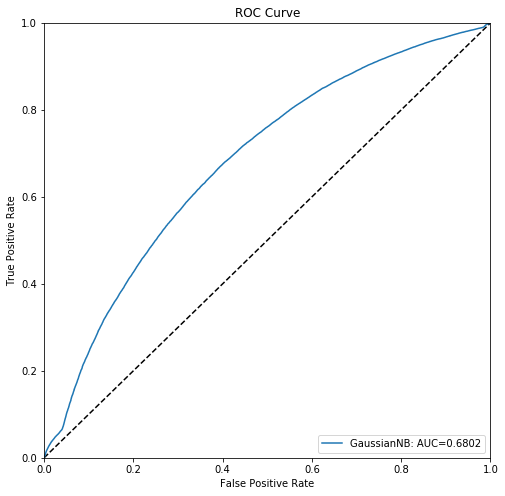

<Figure size 432x288 with 0 Axes>

In [7]:
plot_ROC(fpr1, tpr1, auc1, GaussianNB)
plt.show()
plt.savefig('NaiveBayes_ROC')

### **2. Random Forest**

In [8]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
probs2 = rf.predict_proba(X_test)
predicted2 = rf.predict(X_test)
accuracy2 = accuracy_score(y_test, predicted2)
fpr2, tpr2, _ = roc_curve(y_test, probs2[:,1])
auc2 = roc_auc_score(y_test, probs2[:, 1])
auc2 = round(auc2, 4)

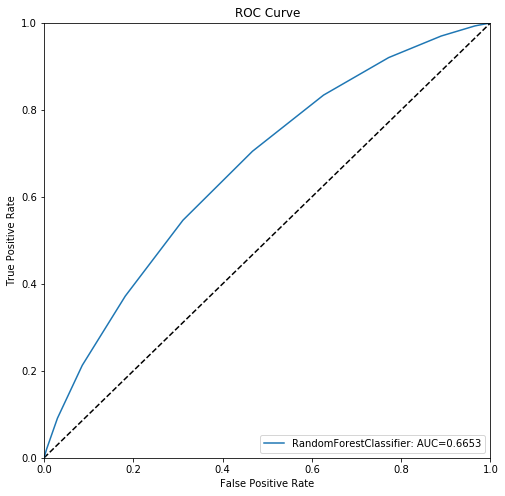

<Figure size 432x288 with 0 Axes>

In [9]:
plot_ROC(fpr2, tpr2, auc2, RandomForestClassifier)
plt.show()
plt.savefig('RandomForest_ROC')

### **3. Logistic Regression**

In [10]:
lgr = LogisticRegression(random_state=0)
lgr.fit(X_train, y_train)
probs3 = lgr.predict_proba(X_test)
predicted3 = lgr.predict(X_test)
accuracy3 = accuracy_score(y_test, predicted3)
fpr3, tpr3, _ = roc_curve(y_test, probs3[:,1])
auc3 = roc_auc_score(y_test, probs3[:, 1])
auc3 = round(auc3, 4)

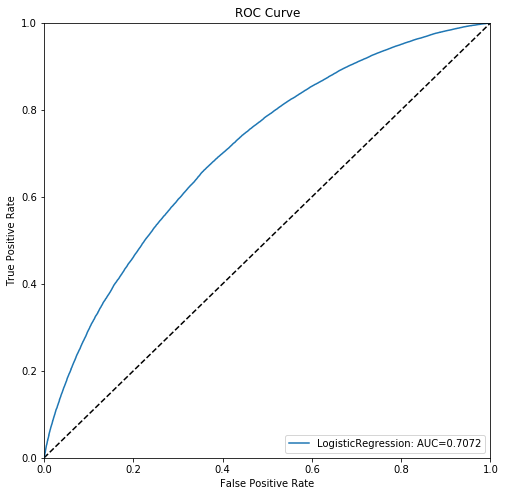

<Figure size 432x288 with 0 Axes>

In [11]:
plot_ROC(fpr3, tpr3, auc3, LogisticRegression)
plt.show()
plt.savefig('logitregression_ROC')

### **4. AdaBoost**

In [12]:
adab = AdaBoostClassifier(n_estimators=50)
adab.fit(X_train, y_train)
probs4 = adab.predict_proba(X_test)
predicted4 = adab.predict(X_test)
accuracy4 = accuracy_score(y_test, predicted4)
fpr4, tpr4, _ = roc_curve(y_test, probs4[:,1])
auc4 = roc_auc_score(y_test, probs4[:, 1])
auc4 = round(auc4,4)

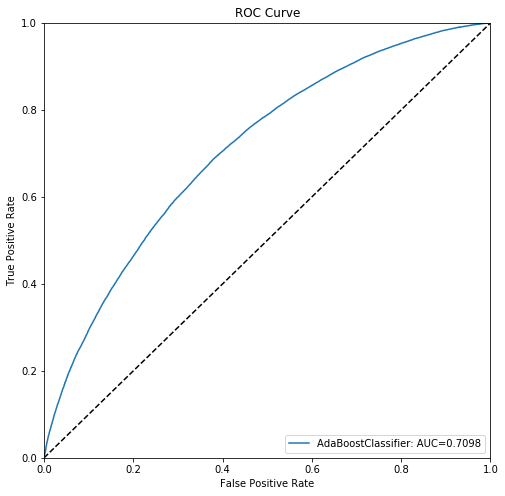

<Figure size 432x288 with 0 Axes>

In [13]:
plot_ROC(fpr4, tpr4, auc4, AdaBoostClassifier)
plt.show()
plt.savefig('AdaBoost_ROC')

In [67]:
accuracy4

0.6529098809360887

### **5. Decision Tree**

In [14]:
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
probs5 = tr.predict_proba(X_test)
predicted5 = tr.predict(X_test)
accuracy5 = accuracy_score(y_test, predicted5)
fpr5, tpr5, _ = roc_curve(y_test, probs5[:,1])
auc5 = roc_auc_score(y_test, probs5[:, 1])

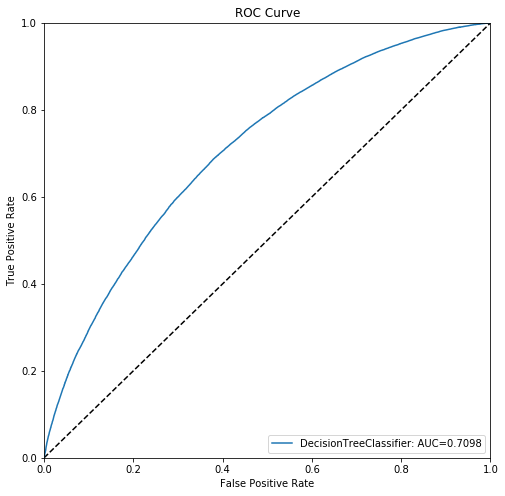

<Figure size 432x288 with 0 Axes>

In [15]:
plot_ROC(fpr4, tpr4, auc4, DecisionTreeClassifier)
plt.show()
plt.savefig('DecisionTree_ROC')

## Model Selection

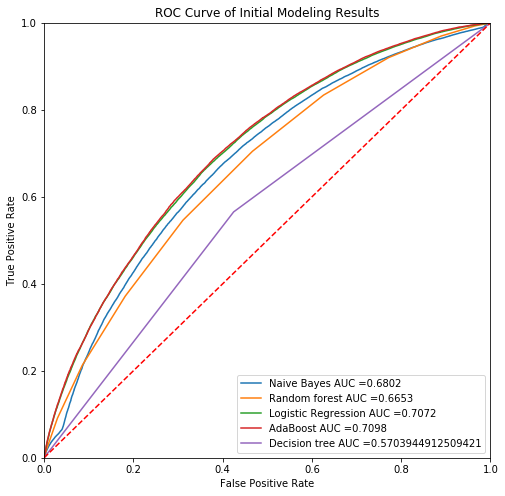

In [16]:
# make ROC plots for the 5 models
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Naive Bayes AUC =' + str(auc1))
plt.plot(fpr2, tpr2, label='Random forest AUC ='+ str(auc2))
plt.plot(fpr3, tpr3, label='Logistic Regression AUC =' + str(auc3))
plt.plot(fpr4, tpr4, label='AdaBoost AUC =' + str(auc4))
plt.plot(fpr5, tpr5, label='Decision tree AUC =' + str(auc5))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Initial Modeling Results')
plt.legend(loc="lower right")
plt.savefig('initial_modeling_ROC')
plt.show()

## Model Tuning

### 1. Random Forest with Randomized Search

In [91]:
rf = RandomForestClassifier(random_state=0)
rf_params = {
             'n_estimators': [10, 30, 40, 50, 60, 80, 100],
             'max_depth': [4, 5, 6, 7],
             'max_features': ['sqrt', 'log2']
             }

# Create estimator
rf_estimator = RandomizedSearchCV(rf, rf_params, scoring='accuracy', cv=5, n_iter=5)
# Train estimator
rf_estimator.fit(X_train, y_train)
print(rf_estimator.best_score_)
print(rf_estimator.best_estimator_)

0.6487278839121899
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


### 2. Logistic Regression with Grid Search

In [37]:
lgr = LogisticRegression(random_state=0)
c = np.logspace(-3,3,7)
lgr_param = dict(C=c)
# create estimator
lgr_estimator = GridSearchCV(lgr, lgr_param, scoring='accuracy')
# train estimator
lgr_estimator.fit(X_train, y_train)
print(lgr_estimator.best_score_)
print(lgr_estimator.best_estimator_)

0.6481997066156879
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### 3. AdaBoost with Randomized Search

In [92]:
ab = AdaBoostClassifier(random_state=0)
ab_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
             'n_estimators': [10, 20, 30, 50, 60, 80, 100]}
# create estimator
ab_estimator = RandomizedSearchCV(ab, ab_params, n_iter=5,scoring='accuracy', cv=5)
# train estimator
ab_estimator.fit(X_train, y_train)
print(ab_estimator.best_score_)
print(ab_estimator.best_estimator_)

0.6505070074372495
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.5, n_estimators=60, random_state=0)


## Model Evaluation

### 1. Random Forest with Best Estimator from Randomized Search

In [98]:
res_rf = {}
start_train = time() # get start time
rf = RandomForestClassifier(random_state=0, max_depth=7, max_features='sqrt', n_estimators=50 )
rf.fit(X_train, y_train)
end_train = time() # get end time    
# calculate the training time
res_rf['train_time'] = end_train - start_train
# get the predictions on the test set(X_test),
start_pred = time() # Get start time
probs_rf = rf.predict_proba(X_test)
predicted_rf = rf.predict(X_test)
end_pred = time() # Get end time
# calculate the total prediction time
res_rf['pred_time'] = end_pred - start_pred
accuracy_rf = accuracy_score(y_test, predicted_rf)
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf[:,1])
auc_rf = roc_auc_score(y_test, probs_rf[:, 1])
auc_rf = round(auc_rf, 4)
cm_rf = confusion_matrix(y_test, predicted_rf)
cr_rf = classification_report(y_test, predicted_rf)

### 2. Logistic Regression with Best Estimator from Grid Search

In [100]:
res_lgr = {}
start_train = time() # get start time
lgr = LogisticRegression(random_state=0, C=0.01)
lgr.fit(X_train, y_train)
end_train = time() # get end time    
# calculate the training time
res_lgr['train_time'] = end_train - start_train
# get the predictions on the test set(X_test),
start_pred = time() # Get start time
probs_lgr = lgr.predict_proba(X_test)
predicted_lgr = lgr.predict(X_test)
end_pred = time() # Get end time
# calculate the total prediction time
res_lgr['pred_time'] = end_pred - start_pred
accuracy_lgr = accuracy_score(y_test, predicted_lgr)
fpr_lgr, tpr_lgr, _ = roc_curve(y_test, probs_lgr[:,1])
auc_lgr = roc_auc_score(y_test, probs_lgr[:, 1])
auc_lgr = round(auc_lgr, 4)
cm_lgr = confusion_matrix(y_test, predicted_lgr)
cr_lgr = classification_report(y_test, predicted_lgr)

### 3. AdaBoost with Best Estimators from Randomized Search

In [101]:
res_ab = {}
start = time() # get start time
ab = AdaBoostClassifier(learning_rate=0.5, n_estimators=60, random_state=42)
ab.fit(X_train, y_train)
end = time() # get end time    
# calculate the training time
res_ab['train_time'] = end - start
# get the predictions on the test set(X_test),
start = time() # Get start time
probs_ab = ab.predict_proba(X_test)
predicted_ab = adab.predict(X_test)
end = time() # Get end time
# calculate the total prediction time
res_ab['pred_time'] = end - start
accuracy_ab = accuracy_score(y_test, predicted_ab)
fpr_ab, tpr_ab, _ = roc_curve(y_test, probs_ab[:,1])
auc_ab = roc_auc_score(y_test, probs_ab[:, 1])
auc_ab = round(auc_ab,4)
cm_ab = confusion_matrix(y_test, predicted_ab)
cr_ab = classification_report(y_test, predicted_ab)

### ROC Plots for the Three Models

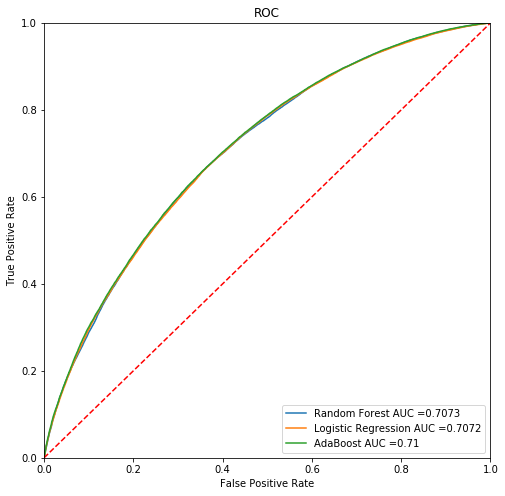

In [102]:
# make ROC plots for the 3 models
plt.figure(figsize=(8,8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest AUC ='+str(auc_rf))
plt.plot(fpr_lgr, tpr_lgr, label='Logistic Regression AUC ='+ str(auc_lgr))
plt.plot(fpr_ab, tpr_ab, label='AdaBoost AUC ='+ str(auc_ab))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('final_modeling_ROC')
plt.show()

### Precision, Recall, and F1 score of the Three Models

In [119]:
print('Random Forest:', '\n', cr_rf)
print('Logistic Regression:', '\n', cr_lgr)
print('AdaBoost:', '\n', cr_ab)

Random Forest: 
              precision    recall  f1-score   support

          0       0.66      0.62      0.64     58460
          1       0.64      0.68      0.66     58452

avg / total       0.65      0.65      0.65    116912

Logistic Regression: 
              precision    recall  f1-score   support

          0       0.64      0.67      0.66     58460
          1       0.66      0.63      0.64     58452

avg / total       0.65      0.65      0.65    116912

AdaBoost: 
              precision    recall  f1-score   support

          0       0.66      0.63      0.65     58460
          1       0.65      0.67      0.66     58452

avg / total       0.65      0.65      0.65    116912



### Training Time and Prediction Time of the Three Models

In [113]:
print('Random Forest:', '\n', res_rf)
print('Logistic Regression:', '\n', res_lgr)
print('AdaBoost:', '\n', res_ab)

Random Forest: 
 {'train_time': 32.01616978645325, 'pred_time': 1.036756992340088}
Logistic Regression: 
 {'train_time': 6.1317949295043945, 'pred_time': 0.014645099639892578}
AdaBoost: 
 {'train_time': 52.38554286956787, 'pred_time': 1.1647019386291504}


## Final Model Selection

**Based on Models' performance and running time, Logistic Regression seems the best model.**

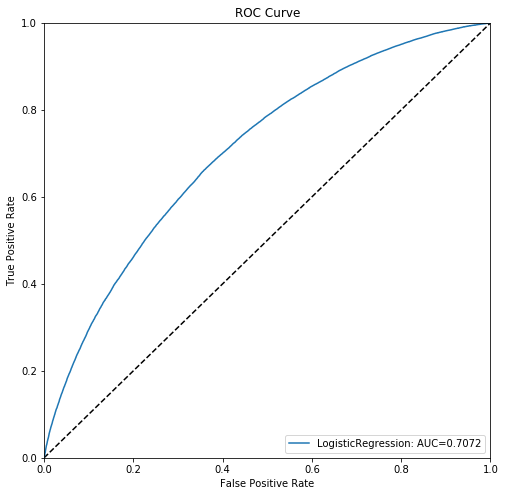

<Figure size 432x288 with 0 Axes>

In [214]:
plot_ROC(fpr_lgr, tpr_lgr, auc_lgr, LogisticRegression)
plt.show()
plt.savefig('final_lgr_ROC')

<Figure size 288x288 with 0 Axes>

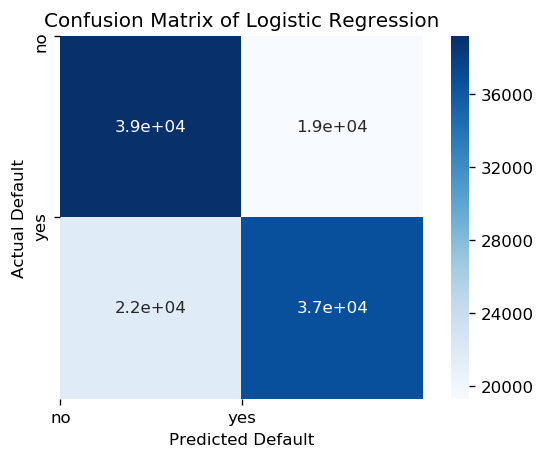

<Figure size 432x288 with 0 Axes>

In [213]:
# create a plot for confustion matrix

plt.figure(figsize=(4,4))
plt.figure(dpi=120)
classes = ["no", "yes"]
tick_marks = np.arange(len(classes))
sns.heatmap(cm_lgr, cmap=plt.cm.Blues, annot=True, square=True)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Default')
plt.ylabel('Actual Default')
plt.title('Confusion Matrix of Logistic Regression');
plt.show() 
plt.savefig('lgr_cm')

## Feature Importance by Logistic Regression

In [158]:
coef_list = lgr.coef_.tolist()

In [159]:
flat_coef_list = [val for sublist in coef_list for val in sublist]

In [188]:
coef_df = pd.DataFrame(flat_coef_list, X_train.columns).reset_index()
coef_df.columns = ['feature', 'coef']
coef_df['abs_coef'] = abs(coef_df['coef'])
coef_df.sort_values('abs_coef', ascending=False, inplace=True)
top_10 = coef_df.iloc[0:11, 0:2]

In [204]:
# top 10 important features (importance by descending)
top_10.feature.tolist()

['int_rate',
 'grade',
 'dti',
 'mort_acc',
 'open_acc',
 'loan_amnt',
 'term_ 60 months',
 'term_ 36 months',
 'total_bc_limit',
 'total_acc',
 'annual_inc']

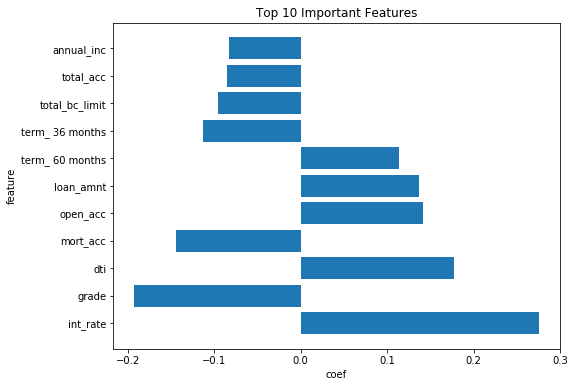

In [211]:
# Plot of top 10 features

plt.figure(figsize=(8,6))
plt.barh(top_10.feature, top_10.coef)
plt.title('Top 10 Important Features')
plt.ylabel('feature')
plt.xlabel('coef')  
plt.savefig('feature_importance.png')